**인공지능 실습 2_1 - MNIST dataset_DNN(Character Recognition with DNN)**

In [1]:
import tensorflow as tf

In [2]:
# dataset 준비
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# preprocessing
x_train = x_train / 255.0 # 0~1 사이로 바꿔주기 위해서
x_test = x_test / 255.0

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='tanh'), # hidden unit : 128개
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6229 - accuracy: 0.8390
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3555 - accuracy: 0.9004
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.9116
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2882 - accuracy: 0.9180
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9237


In [7]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2537 - accuracy: 0.9287 - 549ms/epoch - 2ms/step


[0.25370511412620544, 0.9286999702453613]

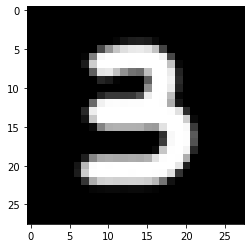

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('test.png') # test.png에 내 손글씨 저장
plt.imshow(im)

In [27]:
im = np.array(im)

In [28]:
a = model.predict(np.reshape(im, (1, 28, 28)))

1/1 [==============================] - 0s 20ms/step


In [29]:
print(a)

[[0.00 0.00 0.01 0.94 0.00 0.05 0.00 0.00 0.00 0.00]]


In [30]:
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.2f}".format(x)})

print(a)
print(max(a[0]))
print(list(a[0]).index(max(a[0]))) # max값의 인덱스 => 인식 결과

[[0.00 0.00 0.01 0.94 0.00 0.05 0.00 0.00 0.00 0.00]]
0.9418153
3
